In [96]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.formula.api import ols, logit
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

## 1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

### BOTTLE

In [2]:
bottle = pd.read_csv("bottle.csv")

/Users/asma/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
bottle.head(2)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [5]:
bottle.describe(include=['O'])  

,Sta_ID,Depth_ID,IncTim,DIC Quality Comment
count,864863,864863,14437,55
unique,2634,864850,199,37
top,090.0 045.0,20-16045S-MX-110-2018-06330900-0025A-3,12/30/1899 05:45:00,CTD Bottle Misfire; DIC sample compromised. C...
freq,10043,2,325,9


In [6]:
bottle.shape

(864863, 74)

### Drop the columns

In [7]:
nulls = bottle.isnull().sum().sort_values(ascending = False)
perc = round(nulls/len(bottle)*100,2)

df_null_bottle = pd.DataFrame(columns =  ['Column','Nulls','Percent'])
df_null_bottle.Column  = nulls.index
df_null_bottle.Nulls = nulls.values
df_null_bottle.Percent = perc.values
df_null_bottle.head(20)

,Column,Nulls,Percent
0,pH2,864853,100.00
1,DIC Quality Comment,864808,99.99
2,pH1,864779,99.99
3,DIC2,864639,99.97
4,TA2,864629,99.97
5,DIC1,862864,99.77
6,TA1,862779,99.76
7,C14A2p,852121,98.53
8,C14A1p,852103,98.52
9,C14As2,850449,98.33


In [8]:
#drop any column with percentage of nulls is greater than 30
for i in df_null_bottle.Column[df_null_bottle['Percent'] > 30]:
    bottle = bottle.drop([i], axis=1)
bottle.shape

(864863, 32)

In [9]:
bottle = bottle.drop(['Sta_ID', 'Depth_ID'], axis=1)

### Mean imputation with numerical values

In [10]:
# Impute the missing values with mean imputation
bottle.fillna(bottle.mean(), inplace=True)
bottle.shape

(864863, 30)

### Standardization

In [11]:
scaler = StandardScaler()
bottle_df_scaled = pd.DataFrame(scaler.fit_transform(bottle),columns=bottle.columns)

## CAST

In [12]:
cast = pd.read_csv("cast.csv")

/Users/asma/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
cast.describe()

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,17202.500000,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,34404.000000,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,...,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.000000,9.000000


In [14]:
cast.describe(include=['O']) 

,Cruise_ID,Cast_ID,Sta_ID,Sta_Code,Date,Time,Lat_Hem,Lon_Hem,Ship_Name,Ship_Code,Data_Type,Orig_Sta_ID,Data_Or,Cruz_Num,Inc_Str,Inc_End,PST_LAN,Civil_T
count,34404,34404,34404,34404,34404,34080,34404,34404,32714,34404,34404,34404,18275,34404,2133,2133,2117,2116
unique,645,34404,2634,7,6466,2730,1,1,33,33,5,4190,5,380,115,200,79,181
top,1988-08-29-C-32NM,19-8402JD-HY-076-0810-10000500,090.0 045.0,ST,09/05/1988,00:00:00,N,W,RV DAVID STARR JORDAN,31JD,HY,90 45,3101,FRONTS88,12/30/1899 12:10:00,12/30/1899 18:00:00,12/30/1899 12:01:00,12/30/1899 17:47:00
freq,433,1,347,15117,30,130,34404,34404,7140,8037,21495,128,15994,433,117,48,68,32


In [15]:
cast.shape

(34404, 61)

### Drop the columns

In [16]:
nulls = cast.isnull().sum().sort_values(ascending = False)
perc = round(nulls/len(cast)*100,2)

df_null_cast = pd.DataFrame(columns =  ['Column','Nulls','Percent'])
df_null_cast.Column  = nulls.index
df_null_cast.Nulls = nulls.values
df_null_cast.Percent = perc.values
df_null_cast.head(20)

,Column,Nulls,Percent
0,Cruz_Leg,32940,95.74
1,ForelU,32327,93.96
2,Civil_T,32288,93.85
3,PST_LAN,32287,93.85
4,IntC14,32275,93.81
5,Inc_Str,32271,93.80
6,Inc_End,32271,93.80
7,TimeZone,29622,86.10
8,Secchi,29141,84.70
9,Visibility,24897,72.37


In [17]:
#drop any column with percentage of nulls is greater than 30
for i in df_null_cast.Column[df_null_cast['Percent'] > 30]:
    cast = cast.drop([i], axis=1)
cast.shape

(34404, 39)

In [18]:
categories = cast.describe(include=['O'])
categories

,Cruise_ID,Cast_ID,Sta_ID,Sta_Code,Date,Time,Lat_Hem,Lon_Hem,Ship_Name,Ship_Code,Data_Type,Orig_Sta_ID,Cruz_Num
count,34404,34404,34404,34404,34404,34080,34404,34404,32714,34404,34404,34404,34404
unique,645,34404,2634,7,6466,2730,1,1,33,33,5,4190,380
top,1988-08-29-C-32NM,19-8402JD-HY-076-0810-10000500,090.0 045.0,ST,09/05/1988,00:00:00,N,W,RV DAVID STARR JORDAN,31JD,HY,90 45,FRONTS88
freq,433,1,347,15117,30,130,34404,34404,7140,8037,21495,128,433


In [19]:
cast = cast.drop(categories.columns,axis=1)

### Mean imputation with numerical values

In [20]:
# Impute the missing values with mean imputation
cast.fillna(cast.mean(), inplace=True)
cast.shape

(34404, 26)

### Standardization 

In [21]:
scaler = StandardScaler()
cast_df_scaled = pd.DataFrame(scaler.fit_transform(cast),columns=cast.columns)

## 2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

In [22]:
bottle_cast = bottle.merge(cast, on='Cst_Cnt')

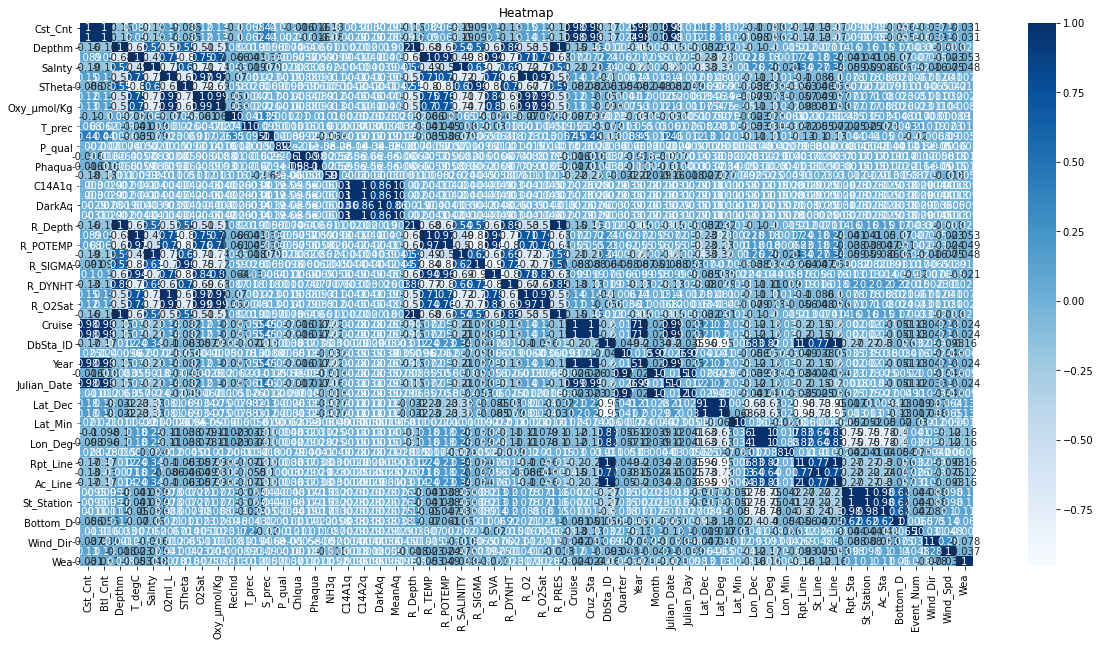

In [23]:
corr =  bottle_cast.corr()
plt.subplots(1,1,figsize=(20,10))
sns.heatmap(corr, annot=True,cmap='Blues')
plt.title("Heatmap")
plt.show()

In [42]:
corr[corr['T_degC']>0.50]['T_degC'].sort_values(ascending = False)

T_degC         1.000000
R_TEMP         1.000000
R_POTEMP       0.973582
R_SVA          0.935155
O2Sat          0.745131
R_O2Sat        0.743683
R_O2           0.712731
O2ml_L         0.712731
Oxy_µmol/Kg    0.696899
Name: T_degC, dtype: float64

I chose features with correlation higher than .50 excluding those with correlation of 1.0

## 3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

In [49]:
eqn = ols("T_degC ~ R_SVA * O2ml_L",data=bottle_cast).fit()

In [50]:
eqn.params

Intercept       1.049904
R_SVA           0.045573
O2ml_L         -0.047219
R_SVA:O2ml_L   -0.000180
dtype: float64

T_degC = (1.1) + (-0.1) R_SVA + (-0.1) O2ml_L + 0.000180 * R_SVA * O2ml_L

### 4. Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

In [52]:
print("R2 value: ",eqn.rsquared)
print("MSE: ",eqn.mse_resid)

R2 value:  0.8750683980375817
MSE:  2.2215104871358218


The R2 is signicantly higher than last week r2_score of 0.24 so multiple regression did better than fitting the data.
while mse is lower than last week mse of 13.5.

### 5.Work with the diabetes dataset to perform multiple logistic regression. 

In [55]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [57]:
eqn = logit("Outcome ~ Age+BMI",data=diabetes).fit()

eqn.params

Optimization terminated successfully.
         Current function value: 0.570101
         Iterations 6


Intercept   -5.403784
Age          0.045608
BMI          0.098250
dtype: float64

Outcome = (-5.4) + 0.045Age + 0.098BMI

### 6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

Recall - the ability of the classifier to find all the positive samples (scikit-learn documentation)

Precision - how many predicted samples are relevant i.e., our mistakes into classifying sample as a correct one if it’s not true

F1 score  -  harmonic mean of the precision and recall, where the score reaches its best value at 1 and worst score at 0

Recall is the best approach because we want patients with no diabeties to be classfied as such out of all the positive samples

In [61]:
conf_matrix = eqn.pred_table()
display(conf_matrix)

array([[434.,  66.],
       [175.,  93.]])

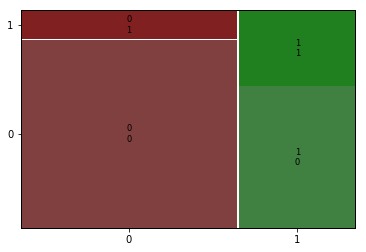

In [65]:
mosaic(conf_matrix)
plt.show()

In [79]:
TN=conf_matrix[0,0]
FN=conf_matrix[1,0]
TP=conf_matrix[1,1]
FP=conf_matrix[0,1]

print(TP/(TP+FN))

0.34701492537313433


## 7.	Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

In [82]:
X=diabetes[["Age","BMI"]]
y=diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [97]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       151
           1       0.49      0.35      0.41        80

    accuracy                           0.65       231
   macro avg       0.60      0.58      0.58       231
weighted avg       0.63      0.65      0.63       231



## 8.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell?

In [90]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       151
           1       0.49      0.51      0.50        80

    accuracy                           0.65       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.65      0.65      0.65       231



The KNN performed better since the recall score of 0.50 is higher than 0.34